In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
CombData = [train_data, test_data]


In [3]:
print("train_data_shape :",train_data.shape)
print(train_data.info())

train_data_shape : (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data[["Sex", "Survived"]].groupby(['Sex'],
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'],
as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
train_data[["Parch", "Survived"]].groupby(['Parch'],
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [9]:
train_data[["Pclass", "Survived"]].groupby(['Pclass'],
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_data[["Embarked", "Survived"]].groupby(['Embarked'],
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


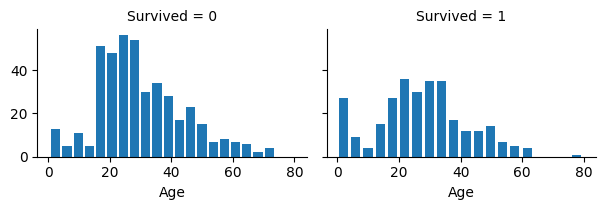

In [11]:
g = sns.FacetGrid(train_data, col='Survived', height = 2.2, aspect = 1.4)
g.map(plt.hist, 'Age', bins=20, width = 3)

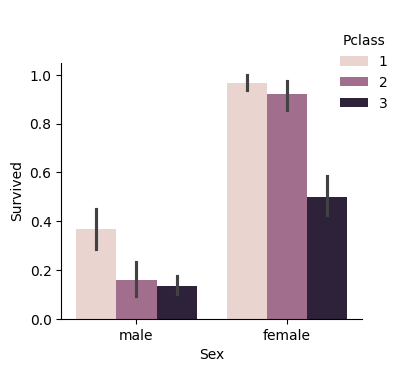

In [12]:
plot = sns.catplot(data=train_data, x="Sex", y="Survived", hue="Pclass", kind="bar")
plot.fig.set_size_inches(4,3)
plot.legend.set_bbox_to_anchor((1,1))
plt.show()

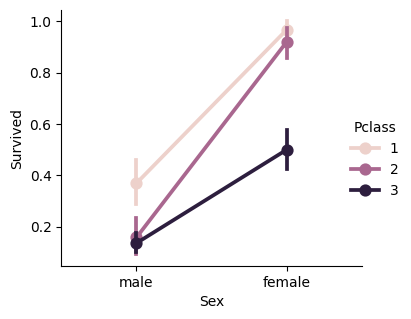

In [13]:
plot = sns.catplot(data=train_data, x="Sex", y="Survived", hue="Pclass", kind="point")
plot.fig.set_size_inches(4,3)

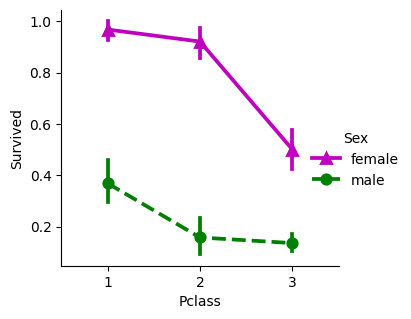

In [14]:
plot = sns.catplot(
    data=train_data, x="Pclass", y="Survived", hue="Sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)
plot.fig.set_size_inches(4,3)

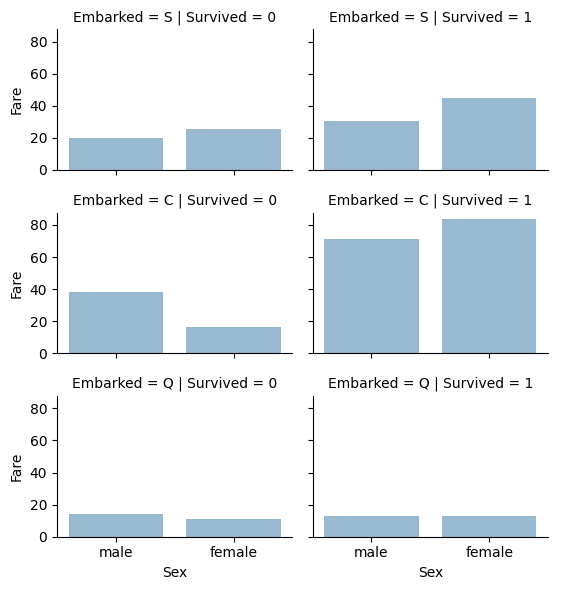

In [15]:

sex_order = ['male', 'female']
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', height = 2, aspect=1.4)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None, order=sex_order)
grid.add_legend()
grid.savefig("/content/train_data_Distribution_Images/dist_srv01.png")


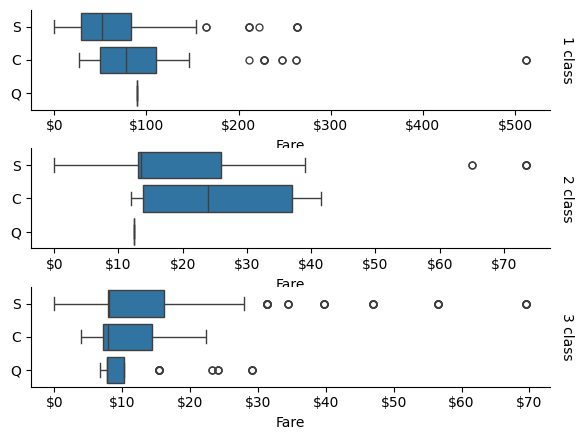

In [16]:
g = sns.catplot(
    data=train_data,
    x="Fare", y="Embarked", row="Pclass",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

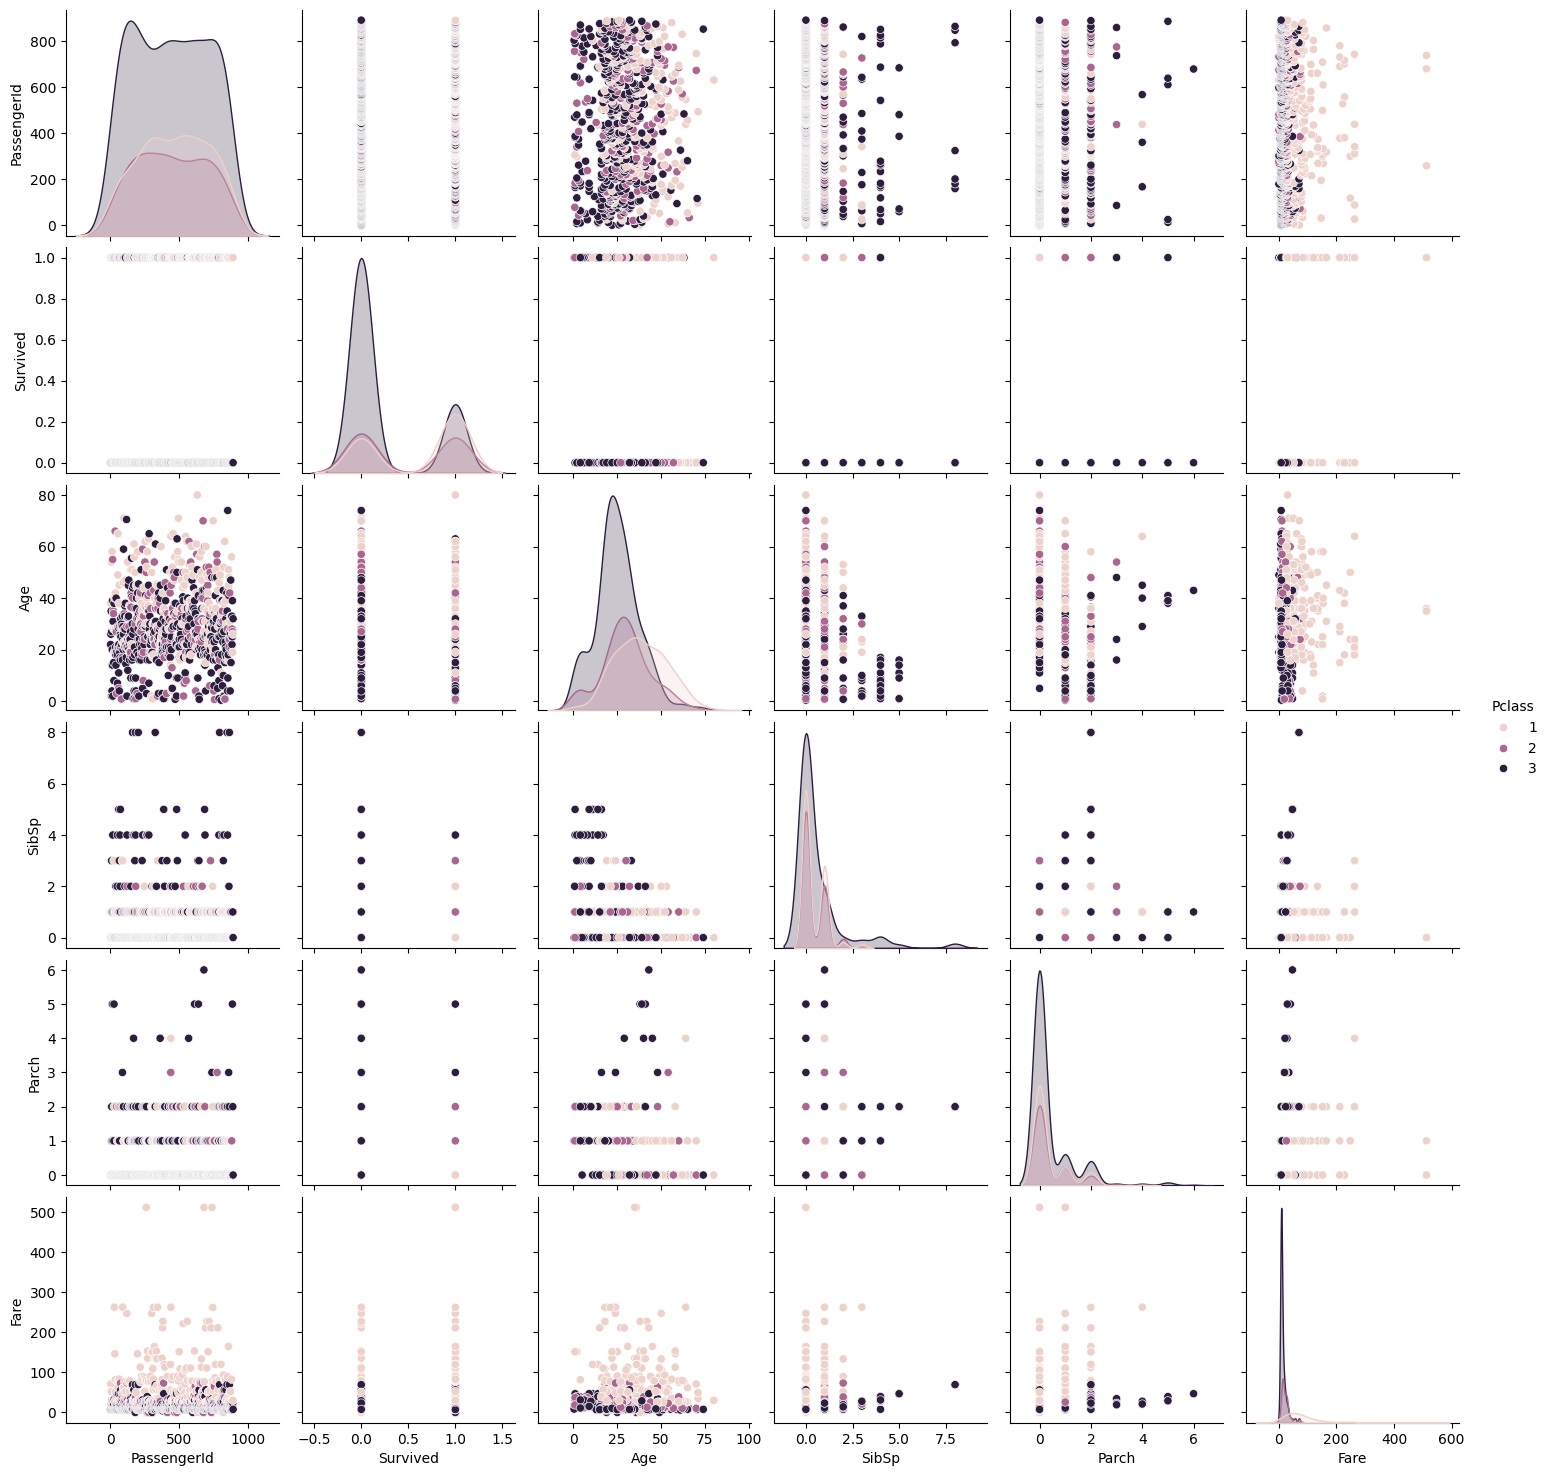

In [17]:
sns.pairplot(data=train_data, hue="Pclass", height=2.5)

# Distribution of Survival

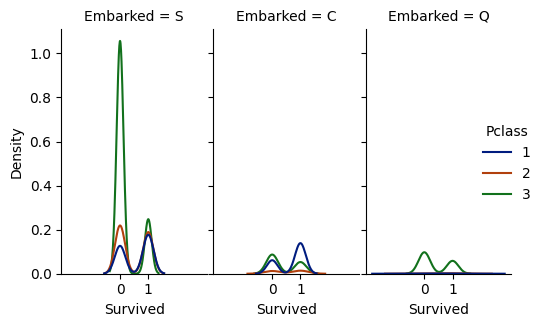

In [25]:
plot = sns.displot(train_data, x="Survived", hue="Pclass", col ="Embarked",kind="kde",palette="dark")
plot.fig.set_size_inches(5,3)
plot.set(xticks=[0,1])
plot.savefig("/content/train_data_Distribution_Images/dist_srv01.png")

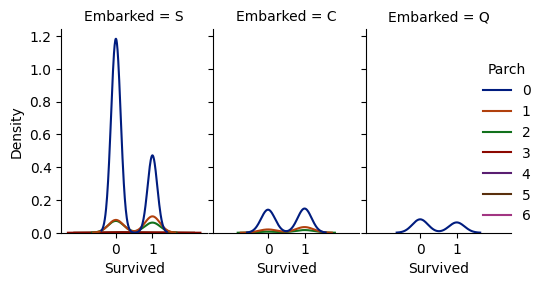

In [26]:
plot = sns.displot(train_data, x="Survived", hue="Parch", col ="Embarked",kind="kde",
                   warn_singular=False,palette="dark")
plot.fig.set_size_inches(5,2.5)
plot.set(xticks=[0,1])
plot.savefig("/content/train_data_Distribution_Images/dist_srv02.png")

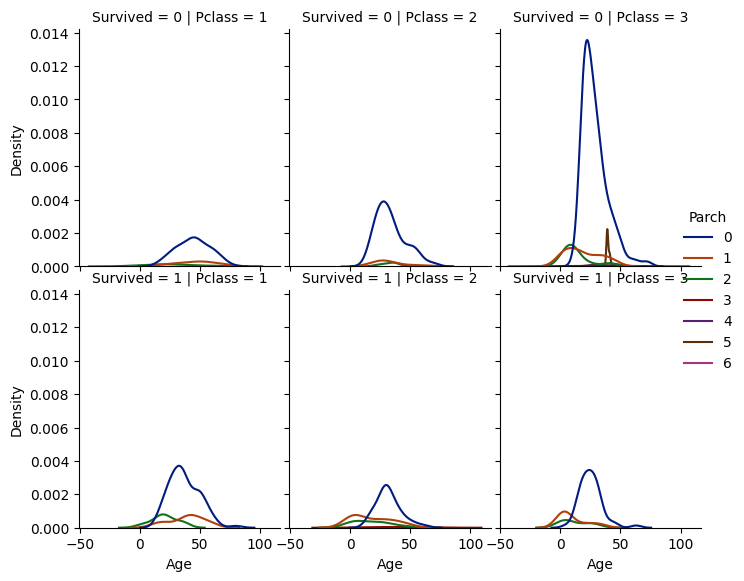

In [27]:
plot = sns.displot(train_data, x="Age", hue="Parch", col="Pclass", row = "Survived",
            kind = "kde", palette="dark",warn_singular=False)
plot.fig.set_size_inches(7,5.5)
plot.savefig("/content/train_data_Distribution_Images/dist_srv03.png")

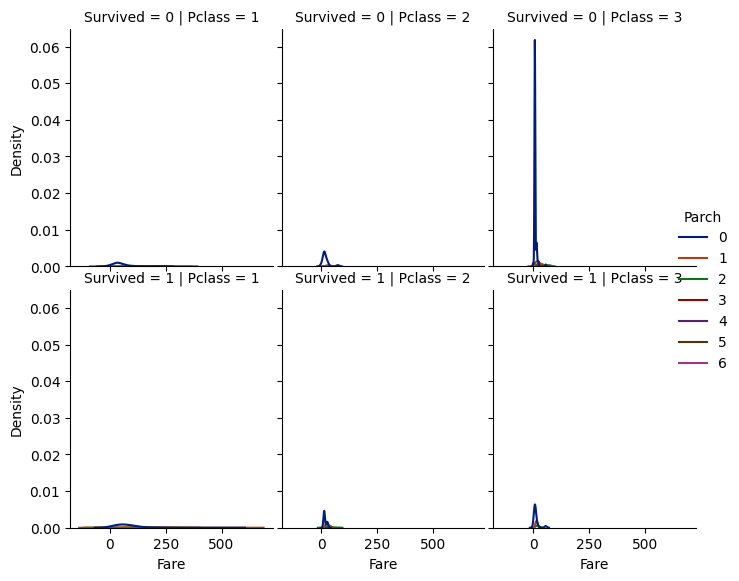

In [28]:
plot = sns.displot(train_data, x="Fare", hue="Parch", col="Pclass", row = "Survived",
            kind = "kde", palette="dark",warn_singular=False)
plot.fig.set_size_inches(7,5.5)
plot.savefig("/content/train_data_Distribution_Images/dist_srv04.png")

# Probability of Survival

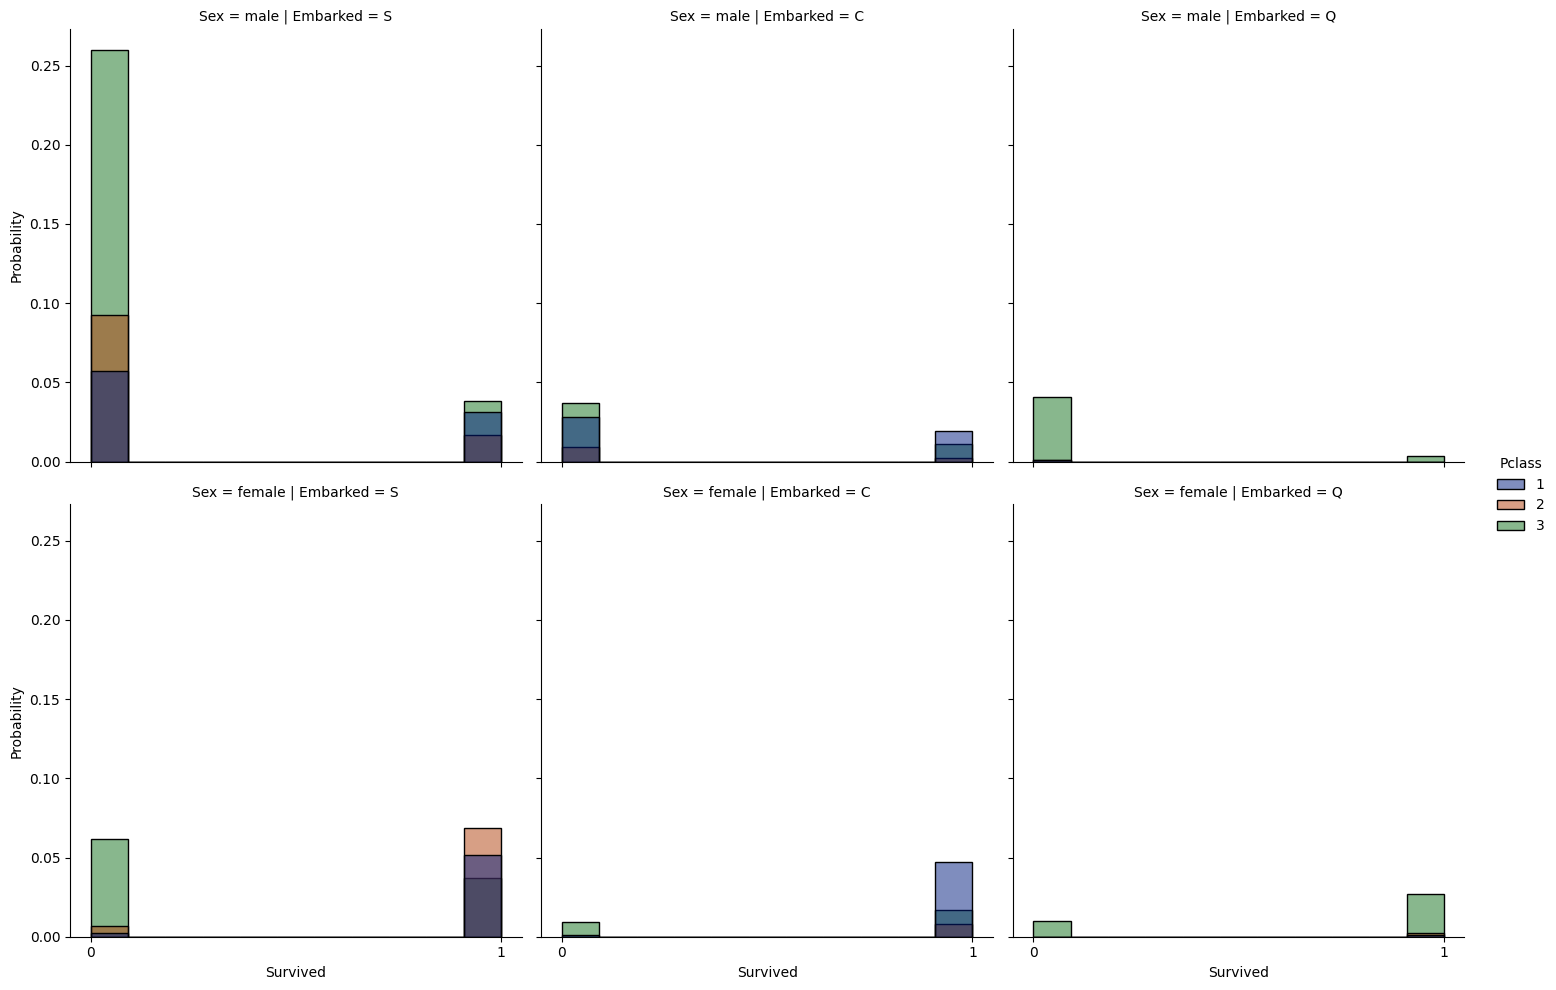

In [29]:
plot = sns.displot(train_data, x="Survived", hue="Pclass", col="Embarked",
            row= "Sex", stat="probability", palette="dark")
plot.set(xticks=[0,1])
plot.savefig("/content/train_data_Distribution_Images/prob_srv01.png")

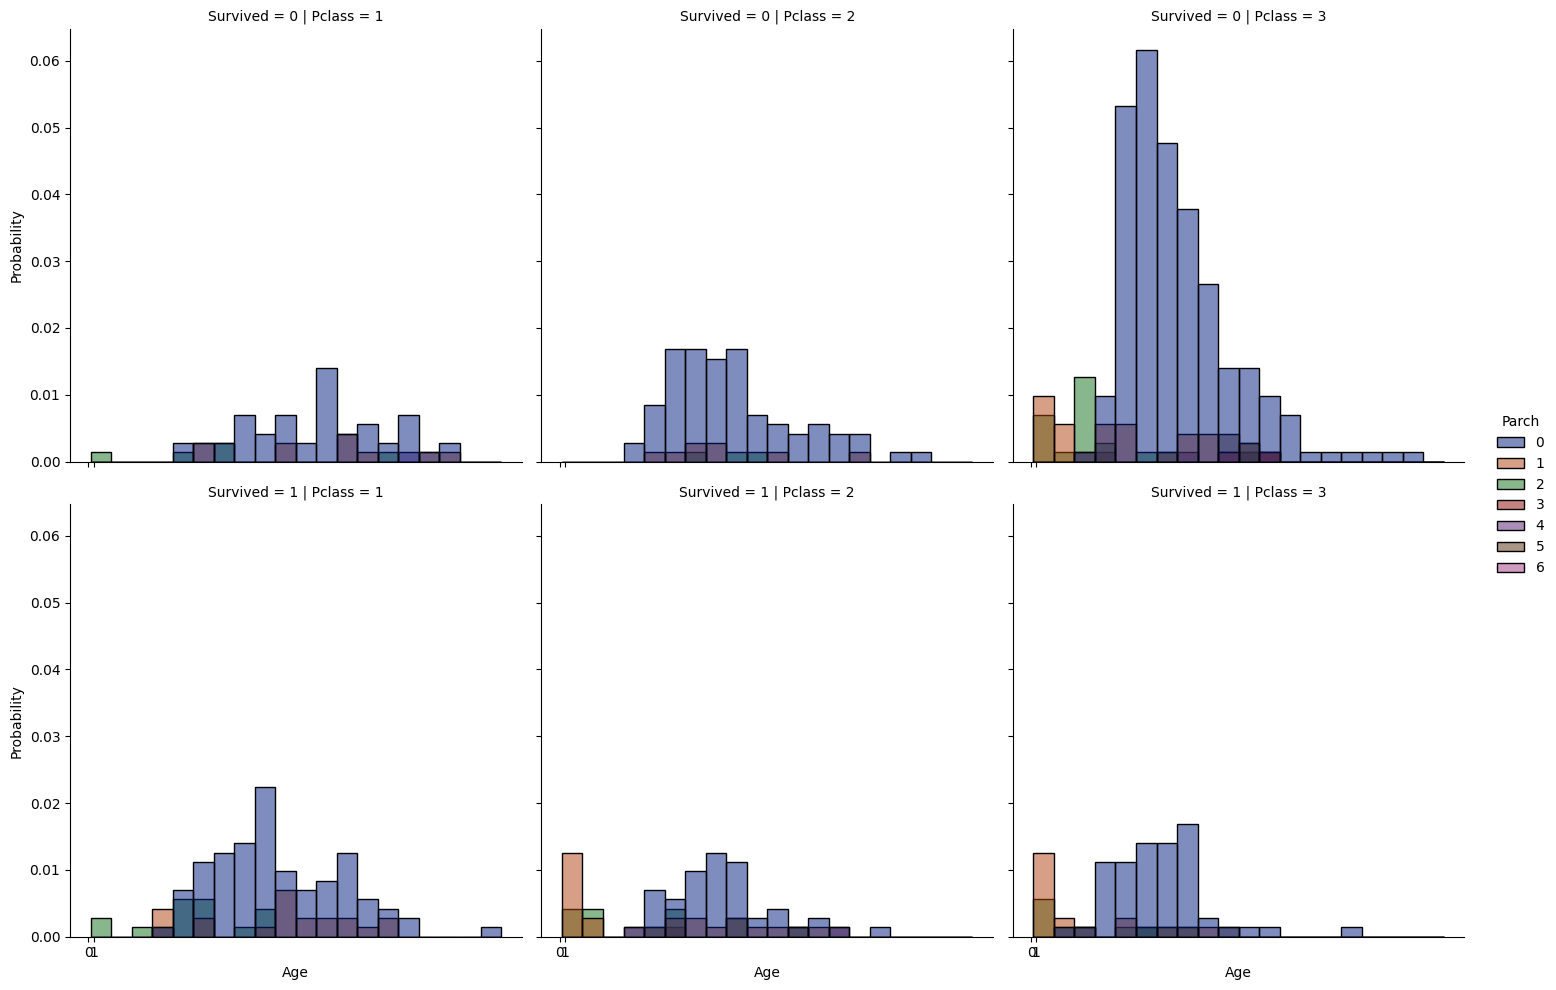

In [30]:
plot = sns.displot(train_data, x="Age", hue="Parch", col="Pclass", row = "Survived",
            stat="probability", palette="dark")
plot.set(xticks=[0,1])
plot.savefig("/content/train_data_Distribution_Images/prob_srv02.png")

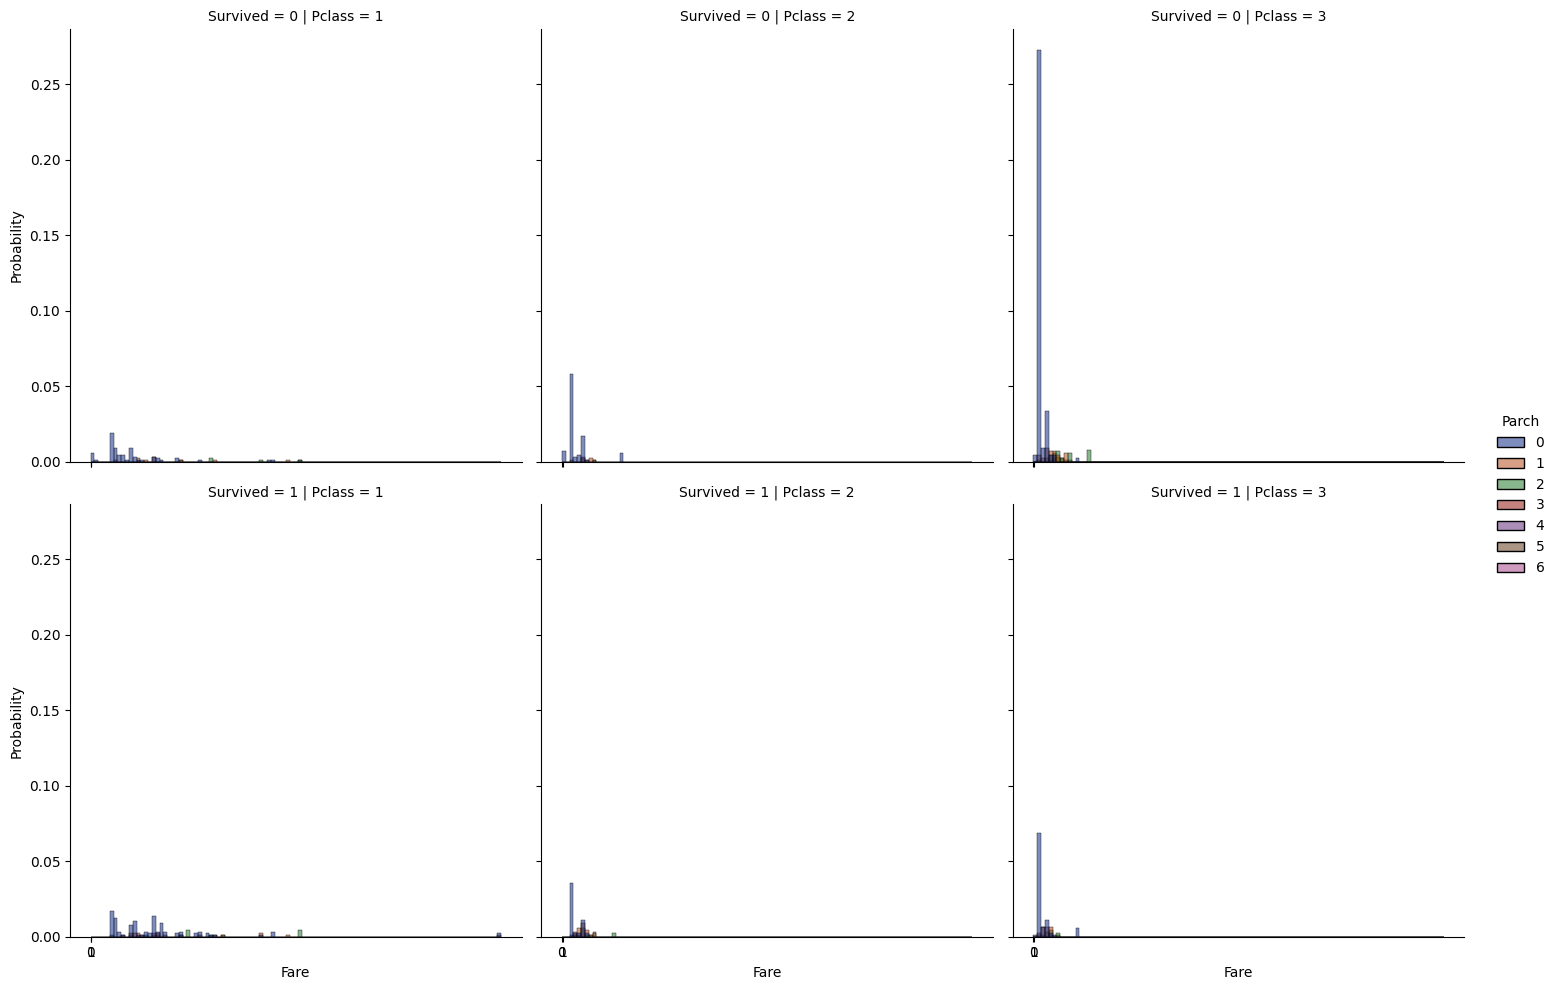

In [31]:
plot = sns.displot(train_data, x="Fare", hue="Parch", col="Pclass", row = "Survived",
            stat="probability", palette="dark")
plot.set(xticks=[0,1])
plot.savefig("/content/train_data_Distribution_Images/prob_srv03.png")